<a href="https://colab.research.google.com/github/syarahmadi/Prosper-Loan-data/blob/master/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Loan Data from Prosper**

**Introduction:**

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This data dictionary explains the variables in the data set.
You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In this project, I am going to answer below questions:

Have people  paied ontime Loan or not? (check Loan Status)


Have loans been more high interest or low interest?


Has having own home been affected on getting loan?

How was Brrow rate affected by ListingCreationDate based on year for people have their own home or not have their own home?

People with What kind of people have got more loan? how about less loan? 

Does income affect on getting loan?


Dose AvailableBankcardCredit affect on BorrowerRate and getting amount of loan?

What is affected on Loan Originial Amount?



1. Load data set
2. exploratory


In [ ]:
# import all packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


%matplotlib inline

# Load dataset

In [ ]:
# load dataset
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
df = pd.read_csv(url)


# Exploratory dataset

In [ ]:
# Return the first 5 rows
df.head(5)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,

In [ ]:
# Return shape of dataset
df.shape

(113937, 81)

In [ ]:
# return iformation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
	df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
df.EmploymentStatus.value_counts()


Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [ ]:
df.StatedMonthlyIncome.value_counts()

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
               ... 
7101.000000       1
2701.083333       1
8183.833333       1
8477.666667       1
3843.500000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [ ]:
df.StatedMonthlyIncome.mean()

5608.025568224836

In [ ]:
df.StatedMonthlyIncome.max()

1750002.916667

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

**Loan status**

Let's explore Loan status data:

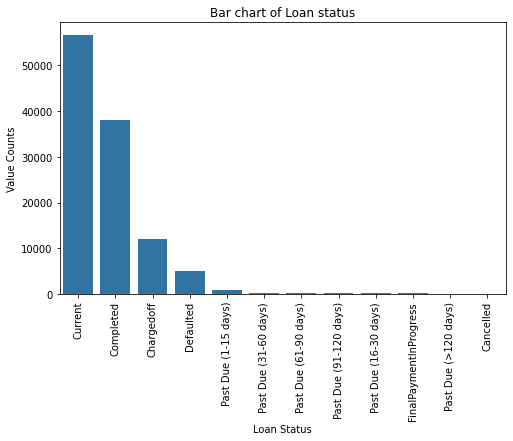

In [ ]:
plt.figure(figsize=[8, 5])
color0 = sb.color_palette()[0]
LoanStatus_order = df.LoanStatus.value_counts().index
sb.countplot(data = df, x = 'LoanStatus',color = color0,order=LoanStatus_order)
plt.xticks(rotation = '90')
plt.title('Bar chart of Loan status')
plt.xlabel('Loan Status')
plt.ylabel('Value Counts')
plt.show()

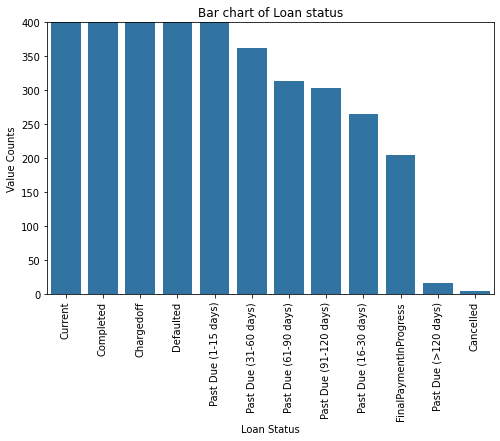

In [ ]:
plt.figure(figsize=[8, 5])
LoanStatus_order=df.LoanStatus.value_counts().index
sb.countplot(data = df, x = 'LoanStatus',color=color0,order=LoanStatus_order)
plt.xticks(rotation = '90')
plt.title('Bar chart of Loan status')
plt.xlabel('Loan Status')
plt.ylabel('Value Counts')
plt.ylim(0,400)
plt.show()

**Insight**: People usually pay ontime thie loan. Here, you can see two category of loan status, Past Due(>120 days) and cancelled very small and almost zero. Main categories are Current, completed, changeoff, Defaulted ,and Pad Due (1-15 days).

**IncomeRange**

In [ ]:
df.IncomeRange.value_counts()


$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

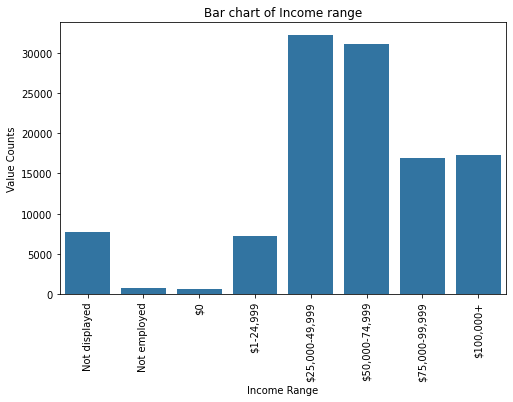

In [ ]:
plt.figure(figsize=[8, 5])
color0 = sb.color_palette()[0]
LoanStatus_order = df.IncomeRange.value_counts().index
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+" ]
sb.countplot(data = df, x = 'IncomeRange',color = color0,order=IncomeRange_order)
plt.xticks(rotation = '90')
plt.title('Bar chart of Income range')
plt.xlabel('Income Range')
plt.ylabel('Value Counts')
plt.show()

Insight: Does income affect on getting loan? People with salary in two ranges 25,000 - $49,999 and $50,000 - $74,999 are main groups to get loan, after that people with more than 75,0000 have got more loan.

**Brrow Rate (APR)**

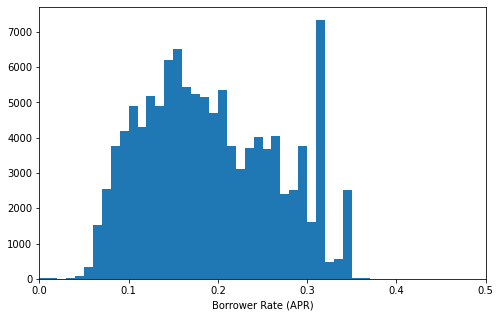

In [ ]:
#plot Borrower Rate 
plt.figure(figsize=[8, 5])
bins = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=df,x="BorrowerRate", bins = bins)
plt.xlim([0,0.5])
plt.xlabel('Borrower Rate (APR)')
plt.show()

**Insight**: Do loans are more high interest or low interest?
APR Of Loans are most between 0.1 to 0.2.

**Occupation**

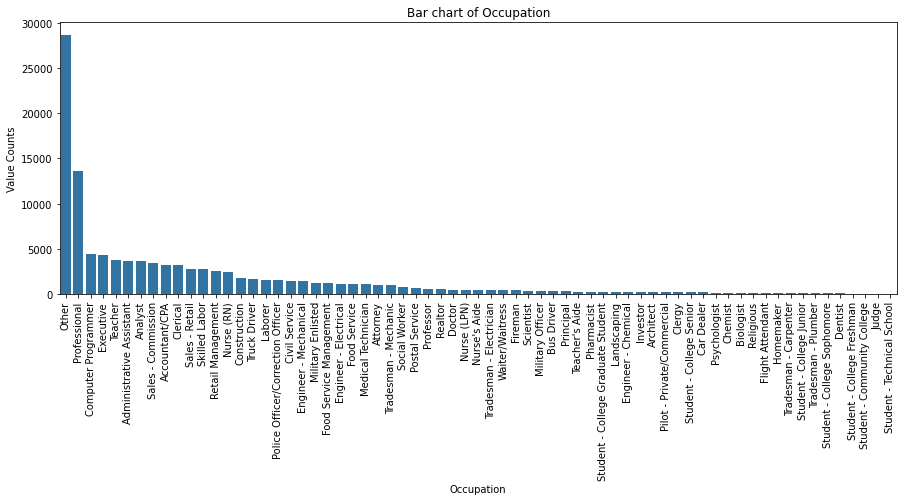

In [ ]:
plt.figure(figsize=[15, 5])
LoanStatus_order=df.Occupation.value_counts().index
sb.countplot(data = df, x = 'Occupation',color=color0,order=LoanStatus_order)
plt.xticks(rotation = '90')
plt.title('Bar chart of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Value Counts')
plt.show()

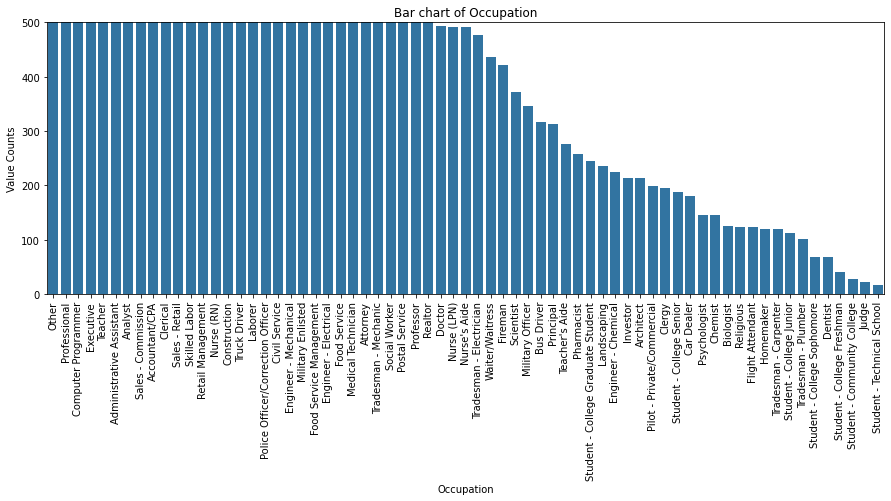

In [ ]:
plt.figure(figsize=[15, 5])
LoanStatusorder=df.Occupation.value_counts().index
sb.countplot(data = df, x = 'Occupation',color=color0,order=LoanStatusorder)
plt.xticks(rotation = '90')
plt.title('Bar chart of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Value Counts')
plt.ylim(0,500)
plt.show()

**Insight**: people with What kind of people have got more loan? how about less loan? 
The Students are less willing to get loan, and computer programmer and professional are most willing to get loan.

**ListingCreationDate**

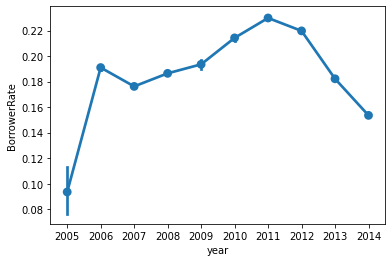

In [ ]:
df['year'] = df.ListingCreationDate.str.split('-').str[0]
year_data = df.year.value_counts()
sb.pointplot(data=df, x='year', y='BorrowerRate');

Listing Creation Date after going up between 2007 to 2011 got started to falling down.

**IsBorrowerHomeowner**

In [ ]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

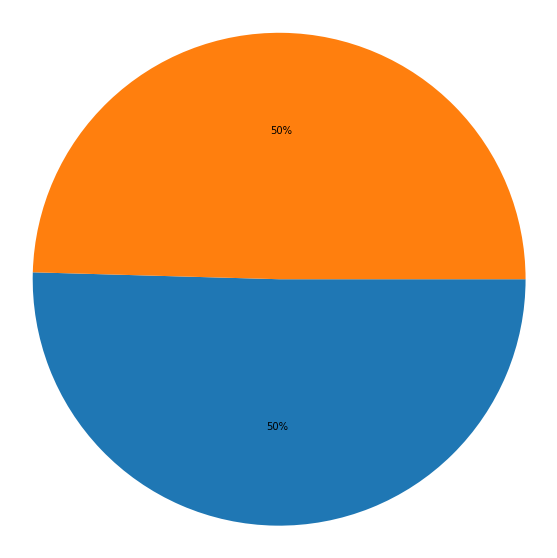

In [ ]:
plt.figure(figsize=[10,10])
stored_counts=df["IsBorrowerHomeowner"].value_counts()
plt.pie(stored_counts, counterclock=False,autopct='%1.0f%%');
plt.axis("square");

Insight: Has having own home been affected on getting loan?You can see have or have not home is not matter overally.

**ListingCreationDate**

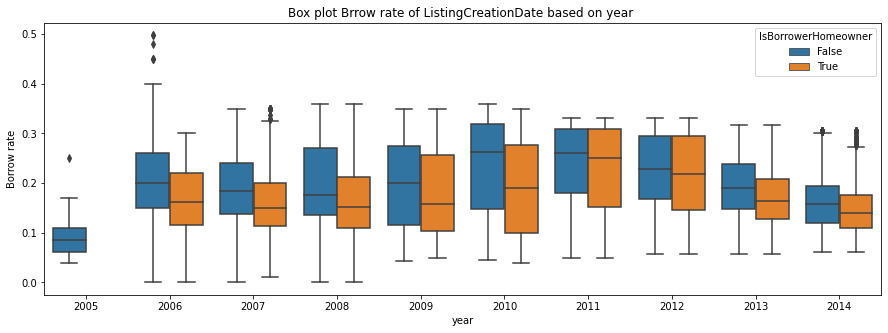

In [ ]:
df['year'] = df.ListingCreationDate.str.split('-').str[0]

box = sb.boxplot(data=df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
plt.title('Box plot Brrow rate of ListingCreationDate based on year ')
plt.xlabel('year')
plt.ylabel('Borrow rate')
box.figure.set_figwidth(15)
box.figure.set_figheight(5)

In above figure, you can see box plot of borrow rate in terms of year. you can 


compare if they had home by their own or not.

**BorrowerRate and AvailableBankcardCredit**

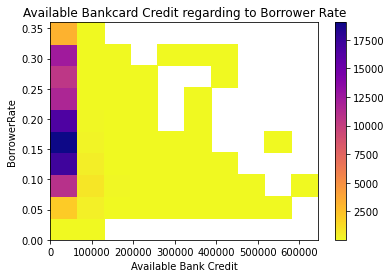

In [ ]:
# remove the null values
df2= df.loc[df.AvailableBankcardCredit.notnull()]
plt.hist2d(data=df2, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'plasma_r', cmin = 0.5);
plt.colorbar()
plt.xlabel('Available Bank Credit')
plt.ylabel('BorrowerRate')
plt.title('Available Bankcard Credit regarding to Borrower Rate');

**Insight**: Dose AvailableBankcardCredit affect on BorrowerRate and getting amount of loan? You can see in above image range of BorowerRate is very wide for having less available bank credit, having higher bank credit causes small range of Borrower Rate which is very low.

**Loan Originial Amount**

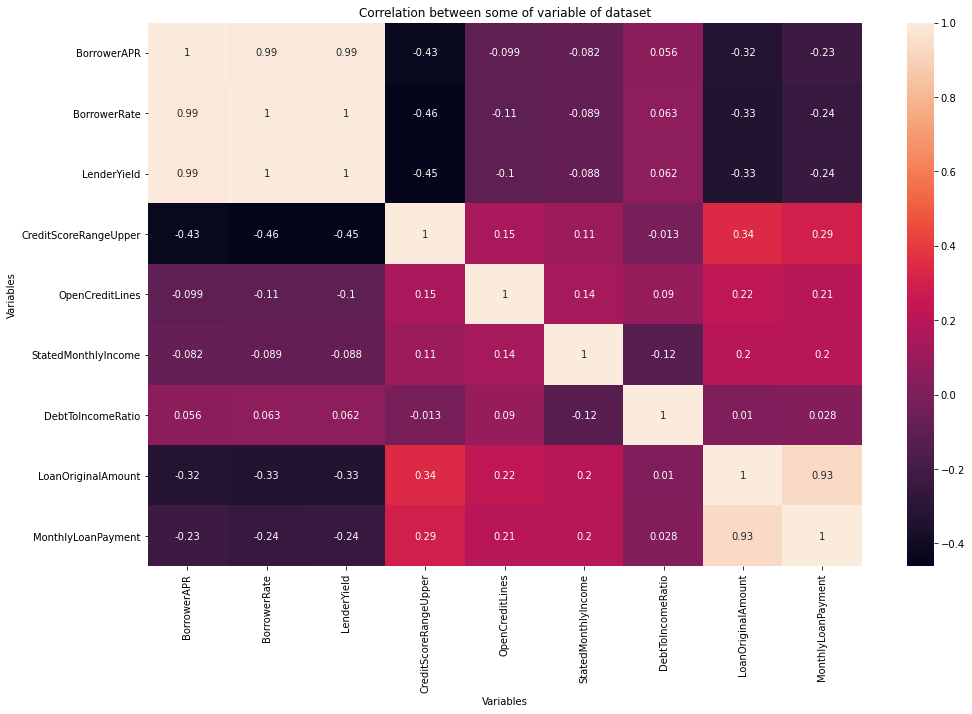

In [ ]:
f = plt.figure(figsize=(16, 10));
value_s = ['LoanStatus', 'ClosedDate', 'ListingCreationDate', 'BorrowerAPR',	'BorrowerRate', 'LenderYield', 'CreditScoreRangeUpper', 'OpenCreditLines' , 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount','MonthlyLoanPayment']
sb.heatmap(df[value_s].corr(), annot=True);
plt.title('Correlation between some of variable of dataset');
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show();

**Insight**: What is affected on Loan Originial Amount?
Credit Scot=re Range Upper and Open Credit Lines have more relationship with Loan orginal amount.